<h1 style="text-align: center; font-family: 'Lucida Console', 'Courier New', monospace;">Singapore HDB Flat Resale Prices (2017-2020)</h1>

<img src="https://i.ibb.co/rw6XmCG/peter-nguyen-singapore.jpg" alt="peter-nguyen-singapore-image" border="0">

<h3 style="font-family: 'Lucida Console', 'Courier New', monospace;">Data Preparation</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv", parse_dates=["month"])
df.rename({"month": "year"}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 80374 non-null  datetime64[ns]
 1   town                 80374 non-null  object        
 2   flat_type            80374 non-null  object        
 3   block                80374 non-null  object        
 4   street_name          80374 non-null  object        
 5   storey_range         80374 non-null  object        
 6   floor_area_sqm       80374 non-null  float64       
 7   flat_model           80374 non-null  object        
 8   lease_commence_date  80374 non-null  int64         
 9   remaining_lease      80374 non-null  object        
 10  resale_price         80374 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 6.7+ MB


In [4]:
df.shape

(80374, 11)

In [5]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [6]:
df.head()

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [7]:
df.iloc[10000:10006]

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
10000,2017-07-01,BUKIT BATOK,4 ROOM,289G,BT BATOK ST 25,04 TO 06,102.0,Model A,1998,80 years,450000.0
10001,2017-07-01,BUKIT BATOK,4 ROOM,395,BT BATOK WEST AVE 5,19 TO 21,92.0,Model A,2004,86 years 02 months,460000.0
10002,2017-07-01,BUKIT BATOK,4 ROOM,384,BT BATOK WEST AVE 5,10 TO 12,92.0,Model A,2005,86 years 06 months,465000.0
10003,2017-07-01,BUKIT BATOK,4 ROOM,621,BT BATOK CTRL,25 TO 27,90.0,Model A,2003,85 years 04 months,570000.0
10004,2017-07-01,BUKIT BATOK,5 ROOM,387,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 04 months,479000.0
10005,2017-07-01,BUKIT BATOK,5 ROOM,392,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 03 months,485000.0


In [8]:
df["flat_type"].value_counts()

4 ROOM              33282
5 ROOM              19947
3 ROOM              19420
EXECUTIVE            6411
2 ROOM               1240
1 ROOM                 37
MULTI-GENERATION       37
Name: flat_type, dtype: int64

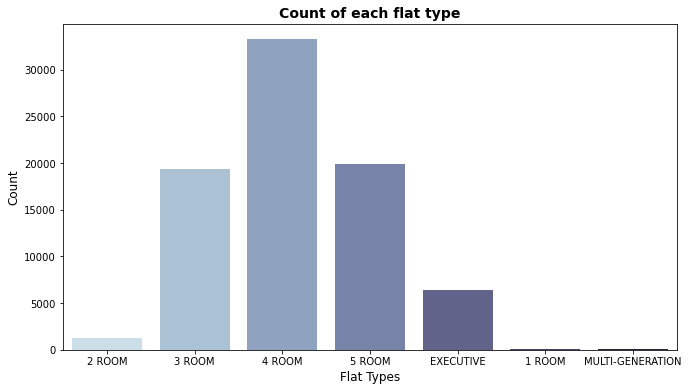

In [9]:
fig, ax = plt.subplots(figsize=(11, 6))
ax = sns.countplot(x="flat_type", palette="ch:s=.25,rot=-.25", data=df)
ax.set_title("Count of each flat type", fontsize=14, fontweight="bold")
ax.set_xlabel("Flat Types", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [10]:
df["flat_model"].value_counts()

Model A                   26288
Improved                  20067
New Generation            11061
Premium Apartment          8689
Simplified                 3368
Apartment                  3257
Maisonette                 2376
Standard                   2260
DBSS                       1332
Model A2                   1045
Adjoined flat               152
Model A-Maisonette          136
Type S1                     134
Type S2                      74
Terrace                      46
Multi Generation             37
Premium Apartment Loft       26
Improved-Maisonette          14
Premium Maisonette           10
2-room                        2
Name: flat_model, dtype: int64

In [11]:
df_flat_models = df[df["flat_model"].isin(["Model A", "Improved", "New Generation", "Premium Apartment", "Simplified", 
                                           "Apartment", "Maisonette", "Standard", "DBSS", "Model A2"])]

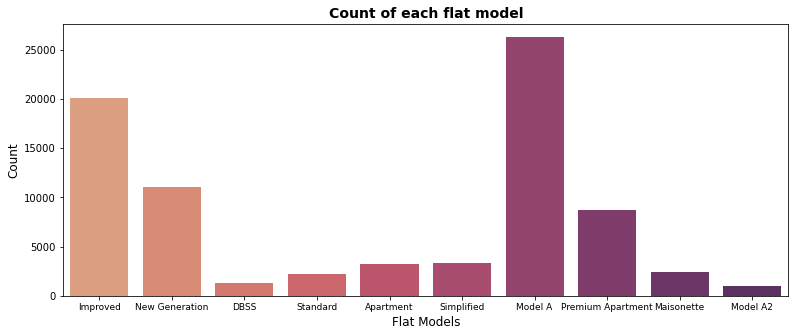

In [12]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.countplot(x="flat_model", palette="flare", data=df_flat_models)
ax.set_title("Count of each flat model", fontsize = 14, fontweight="bold")
ax.set_xlabel("Flat Models", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(fontsize=9)
plt.show()

In [13]:
print("The smallest apartment in the dataset:", df["floor_area_sqm"].min())
print("The average floor area:", df["floor_area_sqm"].mean())
print("The median of floor area:", df["floor_area_sqm"].median())
print("The biggest floor area is", df["floor_area_sqm"].max())

The smallest apartment in the dataset: 31.0
The average floor area: 97.61780426506076
The median of floor area: 95.0
The biggest floor area is 249.0


In [14]:
df_floor_area_median = df.groupby("flat_type")["floor_area_sqm"].median()
print(df_floor_area_median)

flat_type
1 ROOM               31.0
2 ROOM               46.0
3 ROOM               67.0
4 ROOM               93.0
5 ROOM              118.0
EXECUTIVE           146.0
MULTI-GENERATION    165.0
Name: floor_area_sqm, dtype: float64


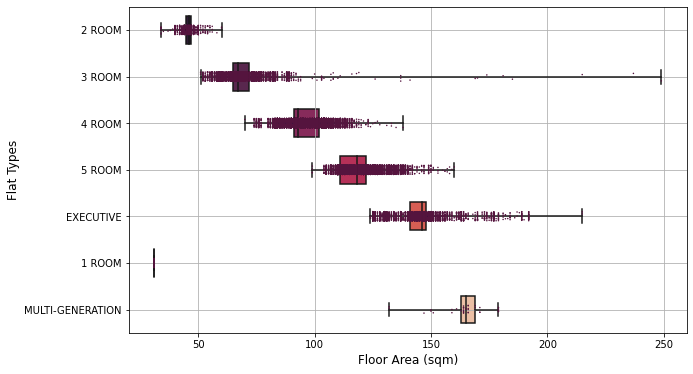

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="floor_area_sqm", y="flat_type", data=df, whis=[0, 100], width=0.6, palette="rocket")
ax = sns.stripplot(x="floor_area_sqm", y="flat_type", data=df, size=1.5, color="#55143E", linewidth=0)
ax.set_xlabel("Floor Area (sqm)", fontsize=12)
ax.set_ylabel("Flat Types", fontsize=12)
ax.grid(True)
plt.show()

In [16]:
num_of_flats_by_town = df.groupby(["town"])["flat_type"].agg(["count"]).sort_values(by="count", ascending=False)
print(num_of_flats_by_town)

                 count
town                  
SENGKANG          6408
WOODLANDS         6019
JURONG WEST       5984
YISHUN            5641
TAMPINES          5235
PUNGGOL           5119
BEDOK             4356
HOUGANG           3848
ANG MO KIO        3613
CHOA CHU KANG     3333
BUKIT PANJANG     3197
BUKIT MERAH       3097
BUKIT BATOK       2953
TOA PAYOH         2646
PASIR RIS         2421
KALLANG/WHAMPOA   2275
QUEENSTOWN        2140
SEMBAWANG         2104
GEYLANG           1928
JURONG EAST       1793
CLEMENTI          1785
SERANGOON         1601
BISHAN            1535
CENTRAL AREA       658
MARINE PARADE      465
BUKIT TIMAH        220


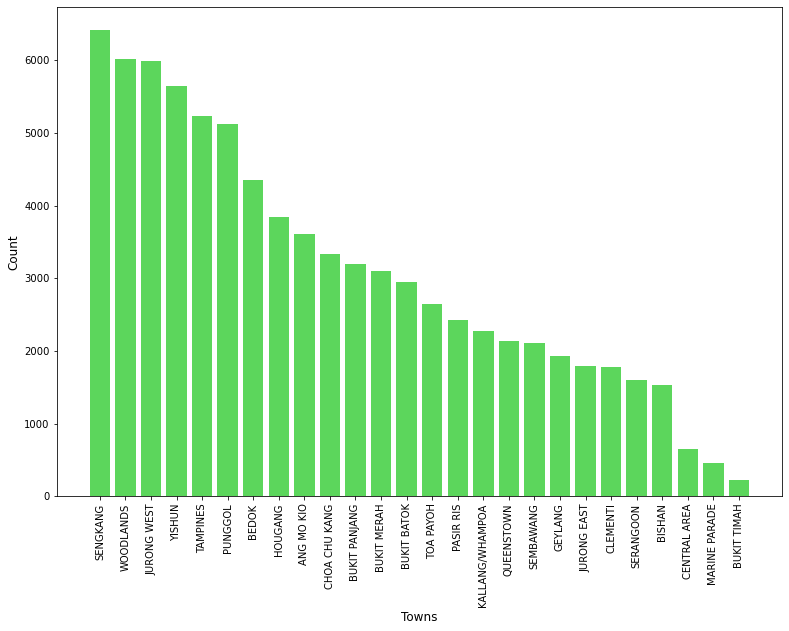

In [17]:
fig, ax = plt.subplots(figsize=(13, 9))
ax.bar(num_of_flats_by_town.index, num_of_flats_by_town["count"], color="#5cd65c")
ax.set_xlabel("Towns", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [18]:
count_flat_by_model = df.groupby(["town", "flat_model"])["flat_model"].count().to_frame(name = "count").reset_index()
count_flat_by_model

,town,flat_model,count
0,ANG MO KIO,Adjoined flat,34
1,ANG MO KIO,Apartment,21
2,ANG MO KIO,DBSS,181
3,ANG MO KIO,Improved,463
4,ANG MO KIO,Maisonette,4
...,...,...,...
219,YISHUN,Model A,2254
220,YISHUN,Multi Generation,21
221,YISHUN,New Generation,1056
222,YISHUN,Premium Apartment,61


In [19]:
print("Number of flat models in towns with the most number of flats")
print("SENGKANG:", count_flat_by_model[count_flat_by_model["town"] == "SENGKANG"]["flat_model"].count())
print("WOODLANDS:", count_flat_by_model[count_flat_by_model["town"] == "WOODLANDS"]["flat_model"].count())
print("JURONG WEST:", count_flat_by_model[count_flat_by_model["town"] == "JURONG WEST"]["flat_model"].count())
print("YISHUN:", count_flat_by_model[count_flat_by_model["town"] == "YISHUN"]["flat_model"].count())
print("TAMPINES:", count_flat_by_model[count_flat_by_model["town"] == "TAMPINES"]["flat_model"].count())

Number of flat models in towns with the most number of flats
SENGKANG: 7
WOODLANDS: 10
JURONG WEST: 12
YISHUN: 10
TAMPINES: 11


In [20]:
new_df = count_flat_by_model[count_flat_by_model["town"].isin(["WOODLANDS", "JURONG WEST", "TAMPINES"])]
new_df

,town,flat_model,count
115,JURONG WEST,Adjoined flat,4
116,JURONG WEST,Apartment,366
117,JURONG WEST,DBSS,45
118,JURONG WEST,Improved,1740
119,JURONG WEST,Maisonette,196
120,JURONG WEST,Model A,2234
121,JURONG WEST,Model A-Maisonette,23
122,JURONG WEST,Model A2,145
123,JURONG WEST,New Generation,287
124,JURONG WEST,Premium Apartment,862


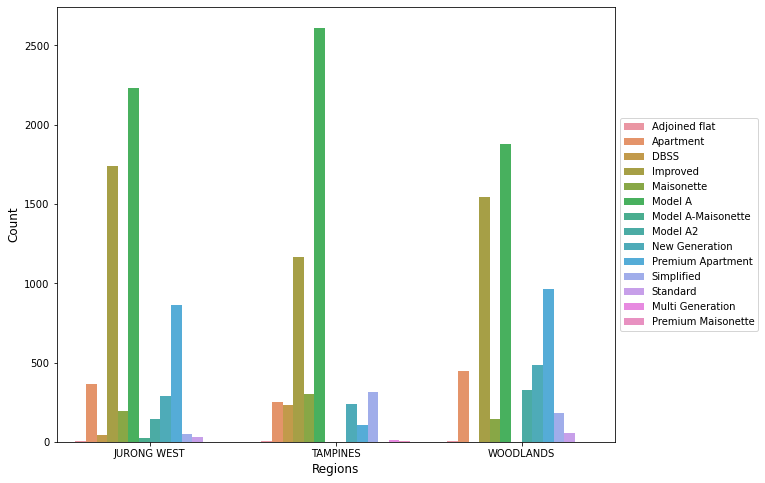

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x="town", y="count", hue="flat_model", data=new_df)
ax.set_xlabel("Regions", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(loc="center left",  bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
df_jurong_west = df[df["town"] == "JURONG WEST"]
df_jurong_west = df_jurong_west.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_jurong_west.head()

,year,mean_price
0,2017-01-01,402120.214286
1,2017-02-01,390337.933333
2,2017-03-01,395489.090909
3,2017-04-01,388023.527324
4,2017-05-01,404778.172840


In [24]:
df_woodlands = df[df["town"] == "WOODLANDS"]
df_woodlands = df_woodlands.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_woodlands.head()

,year,mean_price
0,2017-01-01,390294.734940
1,2017-02-01,393542.756757
2,2017-03-01,384942.636364
3,2017-04-01,394866.715328
4,2017-05-01,380086.545455


In [25]:
df_sengkang = df[df["town"] == "SENGKANG"]
df_sengkang = df_sengkang.groupby("year")["resale_price"].mean().to_frame(name="mean_price").reset_index()
df_sengkang.head()

,year,mean_price
0,2017-01-01,421884.740741
1,2017-02-01,441528.963855
2,2017-03-01,430277.459459
3,2017-04-01,433445.666667
4,2017-05-01,430690.857143


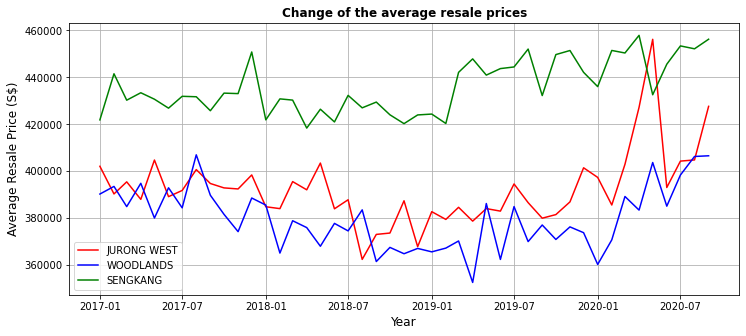

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_jurong_west["year"], df_jurong_west["mean_price"], color="r", label="JURONG WEST")
ax.plot(df_woodlands["year"], df_woodlands["mean_price"], color="b", label="WOODLANDS")
ax.plot(df_sengkang["year"], df_sengkang["mean_price"], color="g", label="SENGKANG")
ax.grid(True)
ax.set_title("Change of the average resale prices", fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Resale Price (S$)", fontsize=12)

lines, handles = ax.get_legend_handles_labels()
ax.legend(lines, handles, loc="best")
plt.show()

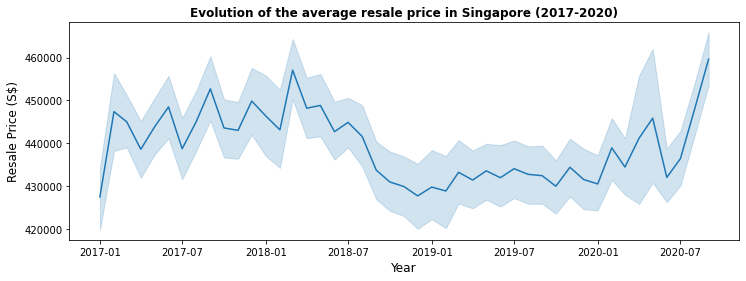

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.lineplot(x="year", y="resale_price", data=df)
ax.set_title("Evolution of the average resale price in Singapore (2017-2020)", fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Resale Price (S$)", fontsize=12)
plt.show()

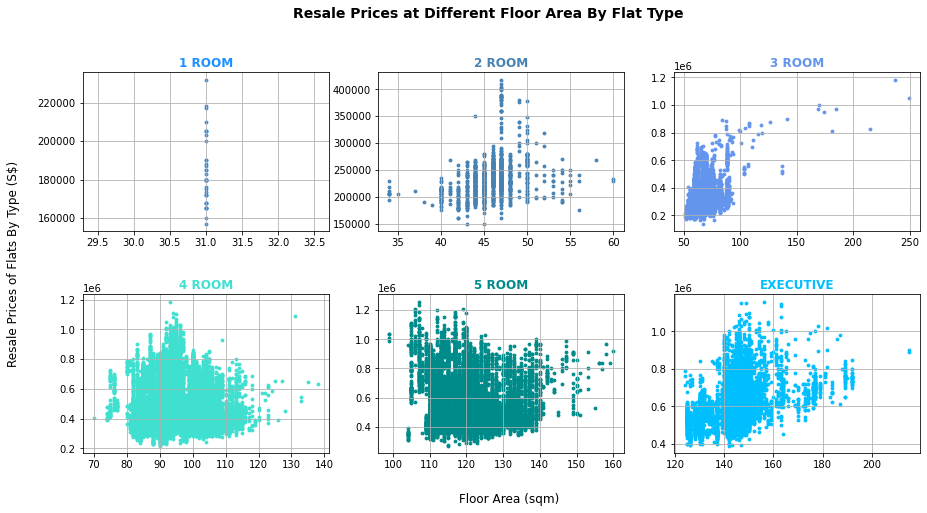

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 7])

fig.suptitle("Resale Prices at Different Floor Area By Flat Type", x=0.5, y=1.01, fontsize=14, fontweight="bold")
fig.supxlabel("Floor Area (sqm)", x=0.52, y=0.02, fontsize=12)
fig.supylabel("Resale Prices of Flats By Type (S$)", x=0.055, y=0.5, fontsize=12)

ax[0, 0].scatter(x=df[df["flat_type"] == "1 ROOM"]["floor_area_sqm"], y=df[df["flat_type"] == "1 ROOM"]["resale_price"], s=8, c="dodgerblue")
ax[0, 1].scatter(x=df[df["flat_type"] == "2 ROOM"]["floor_area_sqm"], y=df[df["flat_type"] == "2 ROOM"]["resale_price"], s=8, c="steelblue")
ax[0, 2].scatter(x=df[df["flat_type"] == "3 ROOM"]["floor_area_sqm"], y=df[df["flat_type"] == "3 ROOM"]["resale_price"], s=8, c="cornflowerblue")
ax[1, 0].scatter(x=df[df["flat_type"] == "4 ROOM"]["floor_area_sqm"], y=df[df["flat_type"] == "4 ROOM"]["resale_price"], s=8, c="turquoise")
ax[1, 1].scatter(x=df[df["flat_type"] == "5 ROOM"]["floor_area_sqm"], y=df[df["flat_type"] == "5 ROOM"]["resale_price"], s=8, c="darkcyan")
ax[1, 2].scatter(x=df[df["flat_type"] == "EXECUTIVE"]["floor_area_sqm"], y=df[df["flat_type"] == "EXECUTIVE"]["resale_price"], s=8, c="deepskyblue")

ax[0, 0].set_title("1 ROOM", fontweight="bold", c="dodgerblue") 
ax[0, 1].set_title("2 ROOM", fontweight="bold", c="steelblue")
ax[0, 2].set_title("3 ROOM", fontweight="bold", c="cornflowerblue")
ax[1, 0].set_title("4 ROOM", fontweight="bold", c="turquoise")
ax[1, 1].set_title("5 ROOM", fontweight="bold", c="darkcyan")
ax[1, 2].set_title("EXECUTIVE", fontweight="bold", c="deepskyblue")

ax[0, 0].grid(True)
ax[0, 1].grid(True)
ax[0, 2].grid(True)
ax[1, 0].grid(True)
ax[1, 1].grid(True)
ax[1, 2].grid(True)

plt.subplots_adjust(hspace = 0.4)
plt.show()

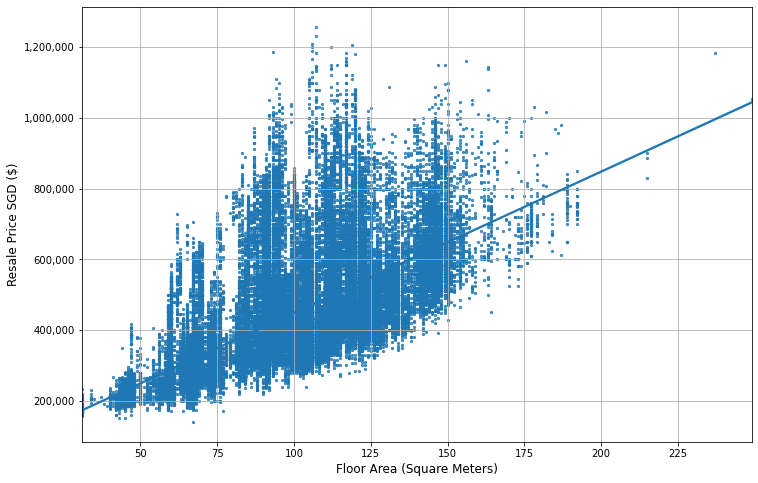

In [118]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.regplot(x="floor_area_sqm", y="resale_price", data=df, scatter_kws={"s": 5})
ax.set_ylabel("Resale Price SGD ($)", fontsize=12)
ax.set_xlabel("Floor Area (Square Meters)", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(True)
plt.show()

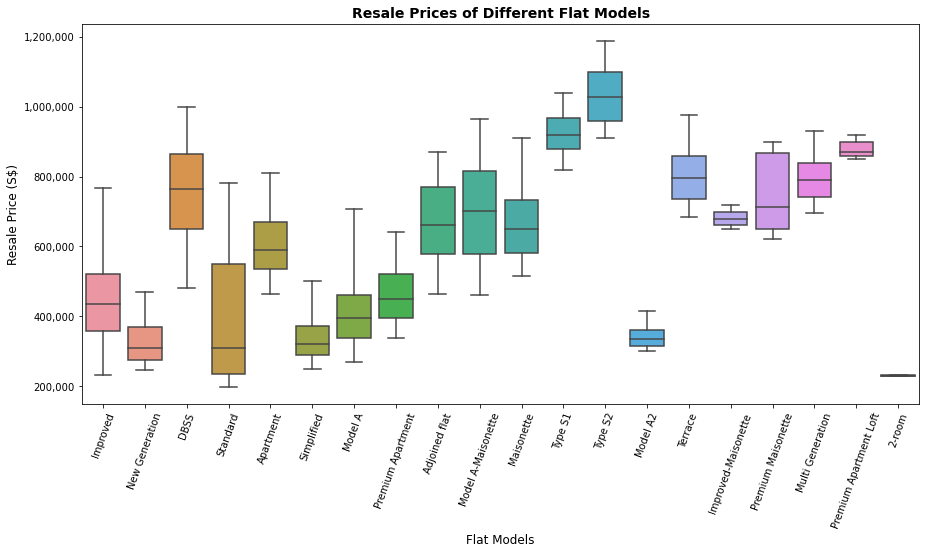

In [104]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot( x="flat_model", y="resale_price", data=df, whis=[5, 95], sym="")
ax.set_title("Resale Prices of Different Flat Models", fontsize = 14, fontweight="bold")
ax.set_xlabel("Flat Models", fontsize=12)
ax.set_ylabel("Resale Price (S$)", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=70)
plt.show()

In [131]:
df_vp = df[df['flat_model'] != '2-room']

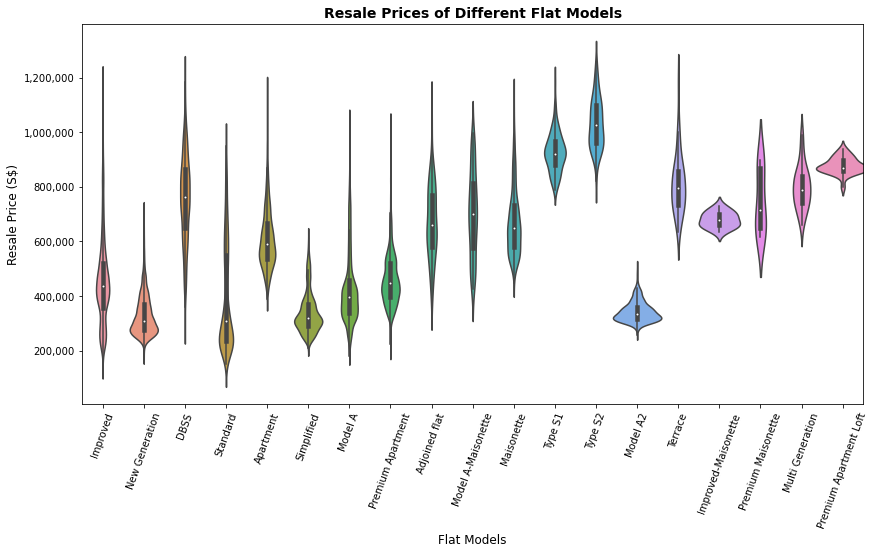

In [132]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.violinplot(x="flat_model", y="resale_price", data=df_vp, width=1.3)
ax.set_title("Resale Prices of Different Flat Models", fontsize = 14, fontweight="bold")
ax.set_xlabel("Flat Models", fontsize=12)
ax.set_ylabel("Resale Price (S$)", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=70)
plt.show()

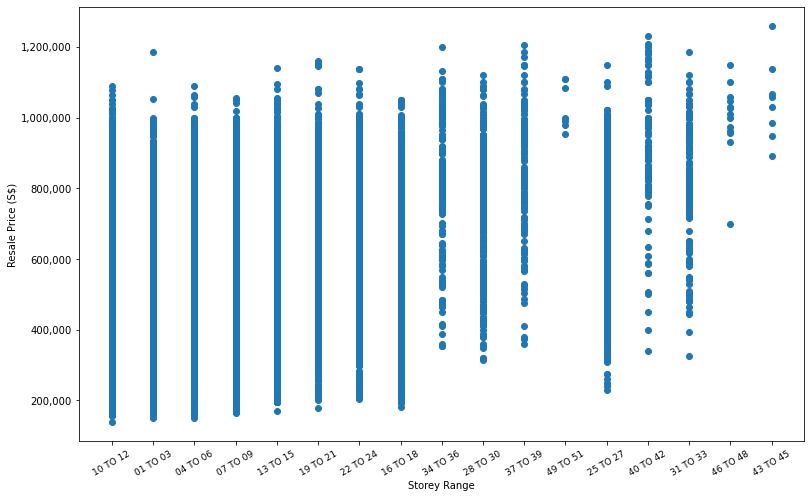

In [99]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(df["storey_range"], df["resale_price"])
ax.set(xlabel="Storey Range", ylabel="Resale Price (S$)")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=9, rotation=30)
plt.show()

In [72]:
avg_rp_1room = df[(df['flat_type'].isin(['1 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_1room.head(7)

,town,resale_price
0,BUKIT MERAH,180000.0


In [149]:
avg_rp_2room = df[(df['flat_type'].isin(['2 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_2room

,town,resale_price
0,ANG MO KIO,210000.0
1,BEDOK,215000.0
2,BUKIT MERAH,226000.0
3,BUKIT PANJANG,230000.0
4,CENTRAL AREA,235000.0
5,CHOA CHU KANG,229000.0
6,CLEMENTI,316500.0
7,GEYLANG,200000.0
8,HOUGANG,233000.0
9,JURONG EAST,240000.0


In [150]:
avg_rp_3room = df[(df['flat_type'].isin(['3 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_3room

,town,resale_price
0,ANG MO KIO,288000.0
1,BEDOK,286000.0
2,BISHAN,371500.0
3,BUKIT BATOK,262500.0
4,BUKIT MERAH,340000.0
5,BUKIT PANJANG,295000.0
6,BUKIT TIMAH,410000.0
7,CENTRAL AREA,409444.0
8,CHOA CHU KANG,279800.0
9,CLEMENTI,315000.0


In [151]:
avg_rp_4room = df[(df['flat_type'].isin(['4 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_4room

,town,resale_price
0,ANG MO KIO,430000.0
1,BEDOK,403000.0
2,BISHAN,554000.0
3,BUKIT BATOK,376000.0
4,BUKIT MERAH,670000.0
5,BUKIT PANJANG,385000.0
6,BUKIT TIMAH,638444.0
7,CENTRAL AREA,755000.0
8,CHOA CHU KANG,340000.0
9,CLEMENTI,530000.0


In [153]:
avg_rp_5room = df[(df['flat_type'].isin(['5 ROOM']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_5room.sort_values(by="resale_price")

,town,resale_price
19,SEMBAWANG,398000.0
24,WOODLANDS,408000.0
8,CHOA CHU KANG,410000.0
13,JURONG WEST,440000.0
20,SENGKANG,450000.0
17,PUNGGOL,450000.0
25,YISHUN,468000.0
5,BUKIT PANJANG,470000.0
16,PASIR RIS,480000.0
11,HOUGANG,485000.0


In [148]:
avg_rp_exect = df[(df['flat_type'].isin(['EXECUTIVE']))].groupby(['town'], as_index=False).agg({'resale_price': 'median'})
avg_rp_exect

,town,resale_price
0,ANG MO KIO,806500.0
1,BEDOK,715500.0
2,BISHAN,890000.0
3,BUKIT BATOK,610000.0
4,BUKIT PANJANG,585000.0
5,BUKIT TIMAH,958888.0
6,CHOA CHU KANG,535000.0
7,CLEMENTI,820000.0
8,GEYLANG,731500.0
9,HOUGANG,665000.0


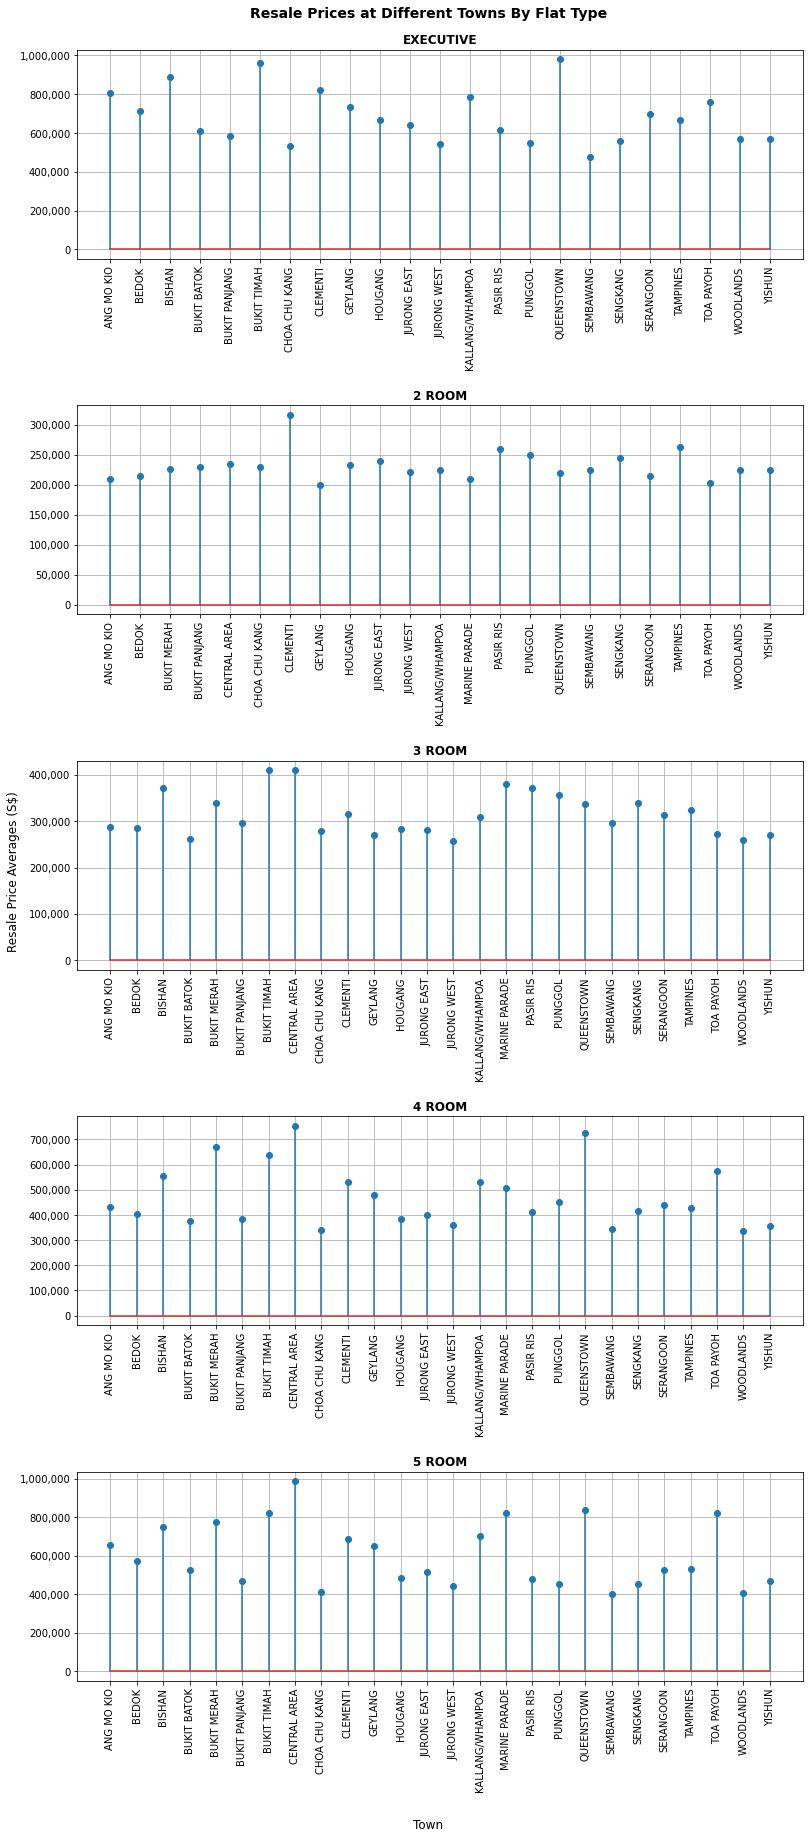

In [117]:
fig, ax = plt.subplots(nrows=5, figsize=(13, 30))

fig.suptitle("Resale Prices at Different Towns By Flat Type", x=0.5, y=0.90, fontsize=14, fontweight="bold")
fig.supxlabel("Town", x=0.5, y=0.055, fontsize=12)
fig.supylabel("Resale Price Averages (S$)", x=0.05, y=0.5, fontsize=12)

ax[0].stem(avg_rp_exect["town"], avg_rp_exect["resale_price"], use_line_collection=True)
ax[1].stem(avg_rp_2room["town"], avg_rp_2room["resale_price"], use_line_collection=True)
ax[2].stem(avg_rp_3room["town"], avg_rp_3room["resale_price"], use_line_collection=True)
ax[3].stem(avg_rp_4room["town"], avg_rp_4room["resale_price"], use_line_collection=True)
ax[4].stem(avg_rp_5room["town"], avg_rp_5room["resale_price"], use_line_collection=True)

ax[0].set_title("EXECUTIVE", fontweight="bold")
ax[1].set_title("2 ROOM", fontweight="bold")
ax[2].set_title("3 ROOM", fontweight="bold")
ax[3].set_title("4 ROOM", fontweight="bold")
ax[4].set_title("5 ROOM", fontweight="bold")

ax[0].tick_params("x", labelrotation=90)
ax[1].tick_params("x", labelrotation=90)
ax[2].tick_params("x", labelrotation=90)
ax[3].tick_params("x", labelrotation=90)
ax[4].tick_params("x", labelrotation=90)

ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[4].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[4].grid(True)

plt.subplots_adjust(hspace = 0.7)
plt.show()


In [133]:
df.head()

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [147]:
df.groupby("town").filter(lambda x: len(x) > 6400)

,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
816,2017-01-01,SENGKANG,2 ROOM,441B,FERNVALE RD,19 TO 21,50.0,Model A,2012,94 years 02 months,273000.0
817,2017-01-01,SENGKANG,3 ROOM,441A,FERNVALE RD,10 TO 12,69.0,Model A,2012,94 years 01 month,342000.0
818,2017-01-01,SENGKANG,3 ROOM,445B,FERNVALE RD,10 TO 12,67.0,Model A,2012,94 years 10 months,345000.0
819,2017-01-01,SENGKANG,3 ROOM,445A,FERNVALE RD,13 TO 15,67.0,Model A,2012,94 years 10 months,348000.0
820,2017-01-01,SENGKANG,3 ROOM,211D,COMPASSVALE LANE,10 TO 12,68.0,Model A,2013,95 years 01 month,360000.0
...,...,...,...,...,...,...,...,...,...,...,...
79750,2020-09-01,SENGKANG,EXECUTIVE,225C,COMPASSVALE WALK,07 TO 09,135.0,Apartment,1999,78 years 03 months,625000.0
79751,2020-09-01,SENGKANG,EXECUTIVE,143,RIVERVALE DR,07 TO 09,135.0,Apartment,1999,78 years 03 months,575000.0
79752,2020-09-01,SENGKANG,EXECUTIVE,189A,RIVERVALE DR,16 TO 18,131.0,Apartment,2000,78 years 11 months,502000.0
79753,2020-09-01,SENGKANG,EXECUTIVE,139,RIVERVALE ST,10 TO 12,141.0,Apartment,1999,77 years 04 months,620000.0
